# 🚀 CHULA Loss Demo on Medical Pills Dataset  
*Unlock the Future with Intelligent Machines* 🤖✨

> 🌸 **CHULA**: *Custom Heuristic Uncertainty-guided Loss for Accurate Land Title Deed Segmentation*  
> 🧠 **Author**: Teerapong Panboonyuen  
> 🚩 Supported by the Second Century Fund (C2F) Postdoctoral Fellowship, Chulalongkorn University  
> 🧪 Reproducible • Plug-and-Play • Open Source for Document AI Research

---

### 📌 Note  
Due to access restrictions on Thai Land Title Deed data, this demo showcases CHULA on a public dataset (medical pills) to highlight its plug-and-play flexibility and generalization power.

---

### 🔗 Links

- 🧬 **GitHub Repository**: [kaopanboonyuen/CHULA](https://github.com/kaopanboonyuen/CHULA)  
- 🌐 **Project Page**: [kaopanboonyuen.github.io/CHULA](https://kaopanboonyuen.github.io/CHULA)  
- 📖 **Reference**: [Ultralytics Datasets Docs](https://docs.ultralytics.com/datasets/)

![](https://b2541915.smushcdn.com/2541915/wp-content/uploads/2021/01/pill-bottle.jpg?lossy=1&strip=1&webp=1)

![](https://github.com/kaopanboonyuen/panboonyuen_dataset/raw/main/public_dataset/ultralytics_dataset/medical-pills-dataset-sample-image.png)

# ✅ Step 1: Install YOLOv8

In [1]:
!pip install ultralytics --upgrade --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 107.4 MB/s eta 0:00:00


# ✅ Step 2: Import libraries

In [2]:
import os, zipfile, glob, random, cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt
import random
from IPython.display import display, Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# 📥 Step 3: Download Medical Pills Dataset

In [3]:
!wget -O medical-pills.zip https://github.com/kaopanboonyuen/panboonyuen_dataset/raw/main/public_dataset/ultralytics_dataset/medical-pills.zip

dataset_dir = "/content/datasets/medical-pills"
os.makedirs(dataset_dir, exist_ok=True)

with zipfile.ZipFile("medical-pills.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/datasets/medical-pills")

print("✅ Dataset extracted to:", dataset_dir)
print("📂 Files inside:", os.listdir(dataset_dir))

--2025-08-19 11:19:48--  https://github.com/kaopanboonyuen/panboonyuen_dataset/raw/main/public_dataset/ultralytics_dataset/medical-pills.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kaopanboonyuen/panboonyuen_dataset/main/public_dataset/ultralytics_dataset/medical-pills.zip [following]
--2025-08-19 11:19:49--  https://raw.githubusercontent.com/kaopanboonyuen/panboonyuen_dataset/main/public_dataset/ultralytics_dataset/medical-pills.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8594628 (8.2M) [application/zip]
Saving to: ‘medical-pills.zip’

medical-pills.zip   100%[==================

# 📝 Step 4: Rewrite medical-pills.yaml for Colab path

In [4]:
yaml_content = f"""# Medical Pill Detection Dataset (Ultralytics format)
path: {dataset_dir}

train: images/train
val: images/val
test:

# Classes (example, adjust if needed in your yaml)
names:
  0: pill

download: https://github.com/kaopanboonyuen/panboonyuen_dataset/raw/main/public_dataset/ultralytics_dataset/medical-pills.zip
"""

with open(os.path.join(dataset_dir, "medical-pills.yaml"), "w") as f:
    f.write(yaml_content)

print("✅ Rewritten medical-pills.yaml")
!cat /content/datasets/medical-pills/medical-pills.yaml

✅ Rewritten medical-pills.yaml
# Medical Pill Detection Dataset (Ultralytics format)
path: /content/datasets/medical-pills

train: images/train
val: images/val
test:

# Classes (example, adjust if needed in your yaml)
names:
  0: pill

download: https://github.com/kaopanboonyuen/panboonyuen_dataset/raw/main/public_dataset/ultralytics_dataset/medical-pills.zip


# 👀 Step 5: Preview dataset images

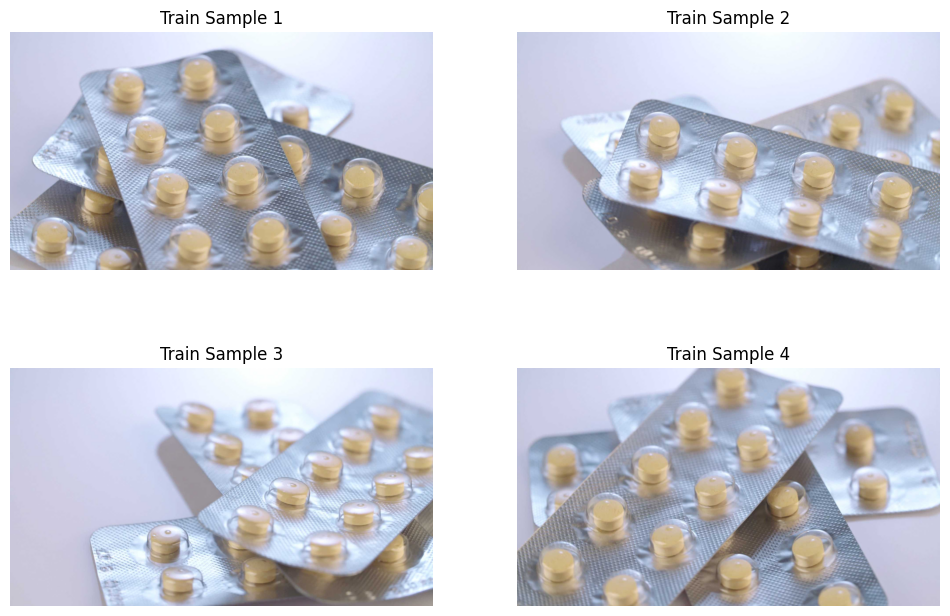

In [5]:
train_images = glob.glob(os.path.join(dataset_dir, "images/train/*.jpg"))
sample_images = random.sample(train_images, 4)

plt.figure(figsize=(12, 8))
for i, img_path in enumerate(sample_images):
    img = cv2.imread(img_path)[..., ::-1]
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Train Sample {i+1}")
plt.show()

# 🚀 Step 6: Train YOLOv8 on Medical Pills Dataset

## CHULA Loss Definition

In [18]:
!git clone https://github.com/kaopanboonyuen/CHULA.git

Cloning into 'CHULA'...
remote: Enumerating objects: 114, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 114 (delta 47), reused 83 (delta 19), pack-reused 0 (from 0)
Receiving objects: 100% (114/114), 9.81 MiB | 15.25 MiB/s, done.
Resolving deltas: 100% (47/47), done.


In [13]:
!pip install -e CHULA >> log_chula.logs

In [19]:
import sys
sys.path.append('/content/CHULA')

from chula.loss import CHULALoss
from chula.utils import compute_class_weights

## CHULA Setup

In [20]:
dataset_dir = "/content/datasets/medical-pills"
num_classes = 1  # adjust
class_weights = compute_class_weights(dataset_dir, num_classes).cuda()
chula_loss = CHULALoss(class_weights=class_weights, lambda_ce=1.0, lambda_unc=0.3, lambda_heu=0.5)

## Train YOLOv8 Original

In [21]:
# --------------------------
# Train YOLOv8 Original
# --------------------------
model_orig = YOLO("yolov8n.pt")
results_orig = model_orig.train(
    data=f"{dataset_dir}/medical-pills.yaml",
    epochs=30,
    imgsz=640,
    batch=16,
    name="yolo_medical_pills_orig"
)

Ultralytics 8.3.181 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/medical-pills/medical-pills.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo_medical_pills_orig, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspectiv

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1537.7±840.1 MB/s, size: 73.4 KB)


train: Scanning /content/datasets/medical-pills/labels/train... 92 images, 0 backgrounds, 0 corrupt: 100%|██████████| 92/92 [00:00<00:00, 1537.89it/s]

train: New cache created: /content/datasets/medical-pills/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 905.9±510.5 MB/s, size: 83.1 KB)


val: Scanning /content/datasets/medical-pills/labels/val... 23 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:00<00:00, 537.91it/s]

val: New cache created: /content/datasets/medical-pills/labels/val.cache


Plotting labels to runs/detect/yolo_medical_pills_orig/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolo_medical_pills_orig
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.48G      1.743      3.503      1.463        428        640: 100%|██████████| 6/6 [00:04<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.81s/it]

                   all         23        399     0.0551      0.952      0.121     0.0726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30       2.5G      1.172      2.679      1.057        342        640: 100%|██████████| 6/6 [00:01<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

                   all         23        399     0.0575      0.995      0.269      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.51G      1.053      1.272     0.9832        360        640: 100%|██████████| 6/6 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]

                   all         23        399          1      0.186      0.937      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.54G      1.072     0.9084     0.9831        376        640: 100%|██████████| 6/6 [00:01<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]


                   all         23        399      0.982      0.689      0.926      0.574

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.56G      1.026     0.7934     0.9678        412        640: 100%|██████████| 6/6 [00:01<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

                   all         23        399       0.98      0.849      0.973      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.57G     0.9584      0.729     0.9675        339        640: 100%|██████████| 6/6 [00:01<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

                   all         23        399      0.984      0.943      0.983      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.59G     0.9973     0.6889     0.9781        378        640: 100%|██████████| 6/6 [00:01<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         23        399       0.99      0.974      0.993      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.61G     0.9716     0.6792     0.9756        362        640: 100%|██████████| 6/6 [00:01<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]

                   all         23        399      0.992      0.977      0.988      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.62G     0.9573     0.6603      0.974        425        640: 100%|██████████| 6/6 [00:01<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]

                   all         23        399      0.993      0.982      0.987      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.64G      0.926     0.6351     0.9626        410        640: 100%|██████████| 6/6 [00:01<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]

                   all         23        399      0.992      0.984      0.986      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.66G     0.9228     0.6198     0.9529        409        640: 100%|██████████| 6/6 [00:01<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]

                   all         23        399      0.985      0.988      0.993      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.68G     0.9334     0.6044     0.9536        320        640: 100%|██████████| 6/6 [00:01<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all         23        399      0.981       0.99      0.991      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.69G     0.8813     0.5882     0.9434        333        640: 100%|██████████| 6/6 [00:01<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         23        399       0.98      0.989      0.989      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.71G      0.911     0.5838     0.9568        372        640: 100%|██████████| 6/6 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


                   all         23        399      0.977       0.99      0.991      0.768

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.73G     0.8802     0.5792      0.951        324        640: 100%|██████████| 6/6 [00:01<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all         23        399      0.979       0.99      0.991      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.74G     0.9098     0.5728     0.9418        419        640: 100%|██████████| 6/6 [00:01<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.49it/s]

                   all         23        399      0.978      0.989      0.993      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.76G      0.867     0.5721      0.925        406        640: 100%|██████████| 6/6 [00:01<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all         23        399      0.982      0.985      0.994      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.78G     0.8627     0.5573     0.9269        442        640: 100%|██████████| 6/6 [00:01<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]

                   all         23        399      0.982      0.987      0.992      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.79G     0.8358     0.5405     0.9177        467        640: 100%|██████████| 6/6 [00:01<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         23        399      0.983      0.986      0.992      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.81G     0.8251     0.5237     0.9114        350        640: 100%|██████████| 6/6 [00:01<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         23        399      0.975       0.99       0.99      0.774


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.83G     0.8424     0.7517     0.9394        201        640: 100%|██████████| 6/6 [00:03<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         23        399      0.978      0.989       0.99      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.85G     0.8231     0.6472     0.9277        194        640: 100%|██████████| 6/6 [00:01<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]

                   all         23        399      0.982      0.983      0.991      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.86G     0.8025      0.588     0.9179        213        640: 100%|██████████| 6/6 [00:01<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]

                   all         23        399      0.985      0.982      0.991      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.88G     0.8021     0.5872     0.9111        205        640: 100%|██████████| 6/6 [00:01<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         23        399      0.987       0.98       0.99      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30       2.9G     0.7886     0.5388     0.9032        197        640: 100%|██████████| 6/6 [00:01<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         23        399      0.987      0.983      0.991      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.91G     0.7932     0.5295     0.9072        209        640: 100%|██████████| 6/6 [00:01<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]


                   all         23        399      0.985      0.986      0.992      0.782

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.93G      0.784     0.5229      0.894        212        640: 100%|██████████| 6/6 [00:01<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]

                   all         23        399      0.985      0.985      0.992      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.95G     0.7812     0.5247     0.9087        194        640: 100%|██████████| 6/6 [00:01<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all         23        399      0.987      0.986      0.991      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.96G     0.7807     0.5159     0.9082        210        640: 100%|██████████| 6/6 [00:01<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all         23        399      0.987      0.986      0.992      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.98G     0.7753     0.5053     0.8963        197        640: 100%|██████████| 6/6 [00:01<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all         23        399      0.986      0.985      0.991      0.793



30 epochs completed in 0.019 hours.
Optimizer stripped from runs/detect/yolo_medical_pills_orig/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolo_medical_pills_orig/weights/best.pt, 6.2MB

Validating runs/detect/yolo_medical_pills_orig/weights/best.pt...
Ultralytics 8.3.181 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


                   all         23        399      0.986      0.985      0.991      0.793
Speed: 0.1ms preprocess, 1.1ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/yolo_medical_pills_orig


In [22]:
results_orig = model_orig.val(save=False, plots=False)

# Option 1: dictionary of results
metrics_orig = results_orig.results_dict
print("📊 Original YOLOv8 metrics:", metrics_orig)

# Option 2: precision, recall, mAP
precision, recall, map50, map50_95 = results_orig.mean_results()
print(f"Precision={precision:.3f}, Recall={recall:.3f}, mAP50={map50:.3f}, mAP50-95={map50_95:.3f}")

Ultralytics 8.3.181 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1227.0±671.2 MB/s, size: 71.7 KB)


val: Scanning /content/datasets/medical-pills/labels/val.cache... 23 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all         23        399      0.986      0.985      0.991       0.79
Speed: 0.2ms preprocess, 9.0ms inference, 0.0ms loss, 1.9ms postprocess per image


📊 Original YOLOv8 metrics: {'metrics/precision(B)': np.float64(0.9859137479464571), 'metrics/recall(B)': np.float64(0.9849624060150376), 'metrics/mAP50(B)': np.float64(0.9914341937046123), 'metrics/mAP50-95(B)': np.float64(0.7903230003115354), 'fitness': np.float64(0.8104341196508431)}
Precision=0.986, Recall=0.985, mAP50=0.991, mAP50-95=0.790


## Train YOLOv8 + CHULA

In [23]:
# --------------------------
# Train YOLOv8 + CHULA
# --------------------------
model_chula = YOLO("yolov8n.pt")

# Patch YOLO internal loss
original_loss = model_chula.model.loss
def patched_loss(preds, targets, imgs=None):
    yolo_loss = original_loss(preds, targets, imgs)
    sigma = torch.rand_like(targets.unsqueeze(1)) * 0.1
    heuristic_masks = {0: targets==0}
    chula_term = chula_loss(preds, targets, sigma=sigma, heuristic_masks=heuristic_masks)
    return yolo_loss + 0.5 * chula_term

model_chula.model.loss = patched_loss

results_chula = model_chula.train(
    data=f"{dataset_dir}/medical-pills.yaml",
    epochs=30,
    imgsz=640,
    batch=16,
    name="yolo_medical_pills_chula"
)

Ultralytics 8.3.181 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/medical-pills/medical-pills.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo_medical_pills_chula, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspecti

train: Scanning /content/datasets/medical-pills/labels/train.cache... 92 images, 0 backgrounds, 0 corrupt: 100%|██████████| 92/92 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 518.3±63.5 MB/s, size: 83.1 KB)


val: Scanning /content/datasets/medical-pills/labels/val.cache... 23 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolo_medical_pills_chula/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolo_medical_pills_chula
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.65G      1.743      3.503      1.463        428        640: 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         23        399     0.0551      0.952      0.121     0.0726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.65G      1.172      2.679      1.057        342        640: 100%|██████████| 6/6 [00:01<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all         23        399     0.0575      0.995      0.269      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.65G      1.053      1.272     0.9832        360        640: 100%|██████████| 6/6 [00:01<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]

                   all         23        399          1      0.186      0.937      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.65G      1.072     0.9084     0.9831        376        640: 100%|██████████| 6/6 [00:01<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

                   all         23        399      0.982      0.689      0.926      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.65G      1.026     0.7934     0.9678        412        640: 100%|██████████| 6/6 [00:01<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]

                   all         23        399       0.98      0.849      0.973      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.65G     0.9584      0.729     0.9675        339        640: 100%|██████████| 6/6 [00:01<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.12it/s]

                   all         23        399      0.984      0.943      0.983      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.65G     0.9973     0.6889     0.9781        378        640: 100%|██████████| 6/6 [00:01<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all         23        399       0.99      0.974      0.993      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.65G     0.9716     0.6792     0.9756        362        640: 100%|██████████| 6/6 [00:01<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]

                   all         23        399      0.992      0.977      0.988      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.65G     0.9573     0.6603      0.974        425        640: 100%|██████████| 6/6 [00:01<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]


                   all         23        399      0.993      0.982      0.987      0.738

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.65G      0.926     0.6351     0.9626        410        640: 100%|██████████| 6/6 [00:01<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]

                   all         23        399      0.992      0.984      0.986      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.65G     0.9228     0.6198     0.9529        409        640: 100%|██████████| 6/6 [00:01<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

                   all         23        399      0.985      0.988      0.993      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.65G     0.9334     0.6044     0.9536        320        640: 100%|██████████| 6/6 [00:01<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all         23        399      0.981       0.99      0.991      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.65G     0.8813     0.5882     0.9434        333        640: 100%|██████████| 6/6 [00:01<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         23        399       0.98      0.989      0.989      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.65G      0.911     0.5838     0.9568        372        640: 100%|██████████| 6/6 [00:01<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all         23        399      0.977       0.99      0.991      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.65G     0.8802     0.5792      0.951        324        640: 100%|██████████| 6/6 [00:01<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all         23        399      0.979       0.99      0.991      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.65G     0.9098     0.5728     0.9418        419        640: 100%|██████████| 6/6 [00:01<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all         23        399      0.978      0.989      0.993      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.65G      0.867     0.5721      0.925        406        640: 100%|██████████| 6/6 [00:01<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]


                   all         23        399      0.982      0.985      0.994      0.764

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.65G     0.8627     0.5573     0.9269        442        640: 100%|██████████| 6/6 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]


                   all         23        399      0.982      0.987      0.992      0.769

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.65G     0.8358     0.5405     0.9177        467        640: 100%|██████████| 6/6 [00:01<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

                   all         23        399      0.983      0.986      0.992      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.65G     0.8251     0.5237     0.9114        350        640: 100%|██████████| 6/6 [00:01<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all         23        399      0.975       0.99       0.99      0.774


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.65G     0.8424     0.7517     0.9394        201        640: 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]

                   all         23        399      0.978      0.989       0.99      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.65G     0.8231     0.6472     0.9277        194        640: 100%|██████████| 6/6 [00:01<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]

                   all         23        399      0.982      0.983      0.991      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.65G     0.8025      0.588     0.9179        213        640: 100%|██████████| 6/6 [00:01<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]

                   all         23        399      0.985      0.982      0.991      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.65G     0.8021     0.5872     0.9111        205        640: 100%|██████████| 6/6 [00:01<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]

                   all         23        399      0.987       0.98       0.99      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.65G     0.7886     0.5388     0.9032        197        640: 100%|██████████| 6/6 [00:01<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         23        399      0.987      0.983      0.991      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.65G     0.7932     0.5295     0.9072        209        640: 100%|██████████| 6/6 [00:01<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]

                   all         23        399      0.985      0.986      0.992      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.65G      0.784     0.5229      0.894        212        640: 100%|██████████| 6/6 [00:01<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]

                   all         23        399      0.985      0.985      0.992      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.65G     0.7812     0.5247     0.9087        194        640: 100%|██████████| 6/6 [00:01<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]

                   all         23        399      0.987      0.986      0.991      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.65G     0.7807     0.5159     0.9082        210        640: 100%|██████████| 6/6 [00:01<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]

                   all         23        399      0.987      0.986      0.992      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.65G     0.7753     0.5053     0.8963        197        640: 100%|██████████| 6/6 [00:01<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]

                   all         23        399      0.986      0.985      0.991      0.793



30 epochs completed in 0.018 hours.
Optimizer stripped from runs/detect/yolo_medical_pills_chula/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolo_medical_pills_chula/weights/best.pt, 6.2MB

Validating runs/detect/yolo_medical_pills_chula/weights/best.pt...
Ultralytics 8.3.181 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


                   all         23        399      0.986      0.985      0.991      0.793
Speed: 0.1ms preprocess, 1.1ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/yolo_medical_pills_chula


In [24]:
# --------------------------
# Evaluate Original YOLOv8
# --------------------------
results_orig = model_orig.val(save=False, plots=False)
metrics_orig = results_orig.results_dict
print("📊 Original YOLOv8 metrics:", metrics_orig)

# --------------------------
# Evaluate YOLOv8 + CHULA
# --------------------------
results_chula = model_chula.val(save=False, plots=False)
metrics_chula = results_chula.results_dict
print("📊 YOLOv8 + CHULA metrics:", metrics_chula)

# --------------------------
# Optional: Unpack mean results (precision, recall, mAP)
# --------------------------
prec_o, rec_o, map50_o, map95_o = results_orig.mean_results()
prec_c, rec_c, map50_c, map95_c = results_chula.mean_results()

print(f"Original: P={prec_o:.3f}, R={rec_o:.3f}, mAP50={map50_o:.3f}, mAP50-95={map95_o:.3f}")
print(f"CHULA:    P={prec_c:.3f}, R={rec_c:.3f}, mAP50={map50_c:.3f}, mAP50-95={map95_c:.3f}")

Ultralytics 8.3.181 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1747.6±755.2 MB/s, size: 71.7 KB)


val: Scanning /content/datasets/medical-pills/labels/val.cache... 23 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]

                   all         23        399      0.986      0.985      0.991       0.79
Speed: 0.1ms preprocess, 2.9ms inference, 0.0ms loss, 2.7ms postprocess per image


📊 Original YOLOv8 metrics: {'metrics/precision(B)': np.float64(0.9859137479464571), 'metrics/recall(B)': np.float64(0.9849624060150376), 'metrics/mAP50(B)': np.float64(0.9914341937046123), 'metrics/mAP50-95(B)': np.float64(0.7903230003115354), 'fitness': np.float64(0.8104341196508431)}
Ultralytics 8.3.181 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1220.7±198.7 MB/s, size: 76.0 KB)


val: Scanning /content/datasets/medical-pills/labels/val.cache... 23 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]

                   all         23        399      0.986      0.985      0.991       0.79
Speed: 0.1ms preprocess, 3.4ms inference, 0.0ms loss, 2.5ms postprocess per image


📊 YOLOv8 + CHULA metrics: {'metrics/precision(B)': np.float64(0.9859137479464571), 'metrics/recall(B)': np.float64(0.9849624060150376), 'metrics/mAP50(B)': np.float64(0.9914341937046123), 'metrics/mAP50-95(B)': np.float64(0.7903230003115354), 'fitness': np.float64(0.8104341196508431)}
Original: P=0.986, R=0.985, mAP50=0.991, mAP50-95=0.790
CHULA:    P=0.986, R=0.985, mAP50=0.991, mAP50-95=0.790


## Compare & Plot Metrics

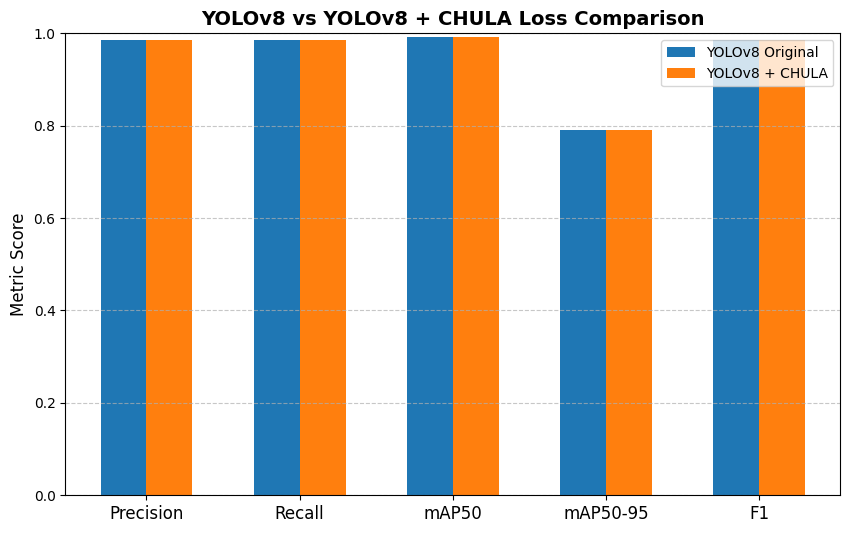

In [25]:
# --------------------------
# Compare & Plot Metrics
# --------------------------
import matplotlib.pyplot as plt

# Extract from results_dict
def extract_metrics(results_dict):
    precision = results_dict.get("metrics/precision(B)", 0.0)
    recall = results_dict.get("metrics/recall(B)", 0.0)
    map50 = results_dict.get("metrics/mAP50(B)", 0.0)
    map95 = results_dict.get("metrics/mAP50-95(B)", 0.0)
    # F1 from precision & recall
    f1 = 2 * (precision * recall) / (precision + recall + 1e-6)
    return precision, recall, map50, map95, f1

# Get values
prec_o, rec_o, map50_o, map95_o, f1_o = extract_metrics(metrics_orig)
prec_c, rec_c, map50_c, map95_c, f1_c = extract_metrics(metrics_chula)

labels = ["Precision", "Recall", "mAP50", "mAP50-95", "F1"]
orig_vals = [prec_o, rec_o, map50_o, map95_o, f1_o]
chula_vals = [prec_c, rec_c, map50_c, map95_c, f1_c]

# Plot side-by-side bars
x = range(len(labels))
plt.figure(figsize=(10,6))
plt.bar([i-0.15 for i in x], orig_vals, width=0.3, label="YOLOv8 Original")
plt.bar([i+0.15 for i in x], chula_vals, width=0.3, label="YOLOv8 + CHULA")
plt.xticks(x, labels, fontsize=12)
plt.ylabel("Metric Score", fontsize=12)
plt.ylim(0,1)
plt.title("YOLOv8 vs YOLOv8 + CHULA Loss Comparison", fontsize=14, weight="bold")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 📊 Step 7: Visualize Training Results

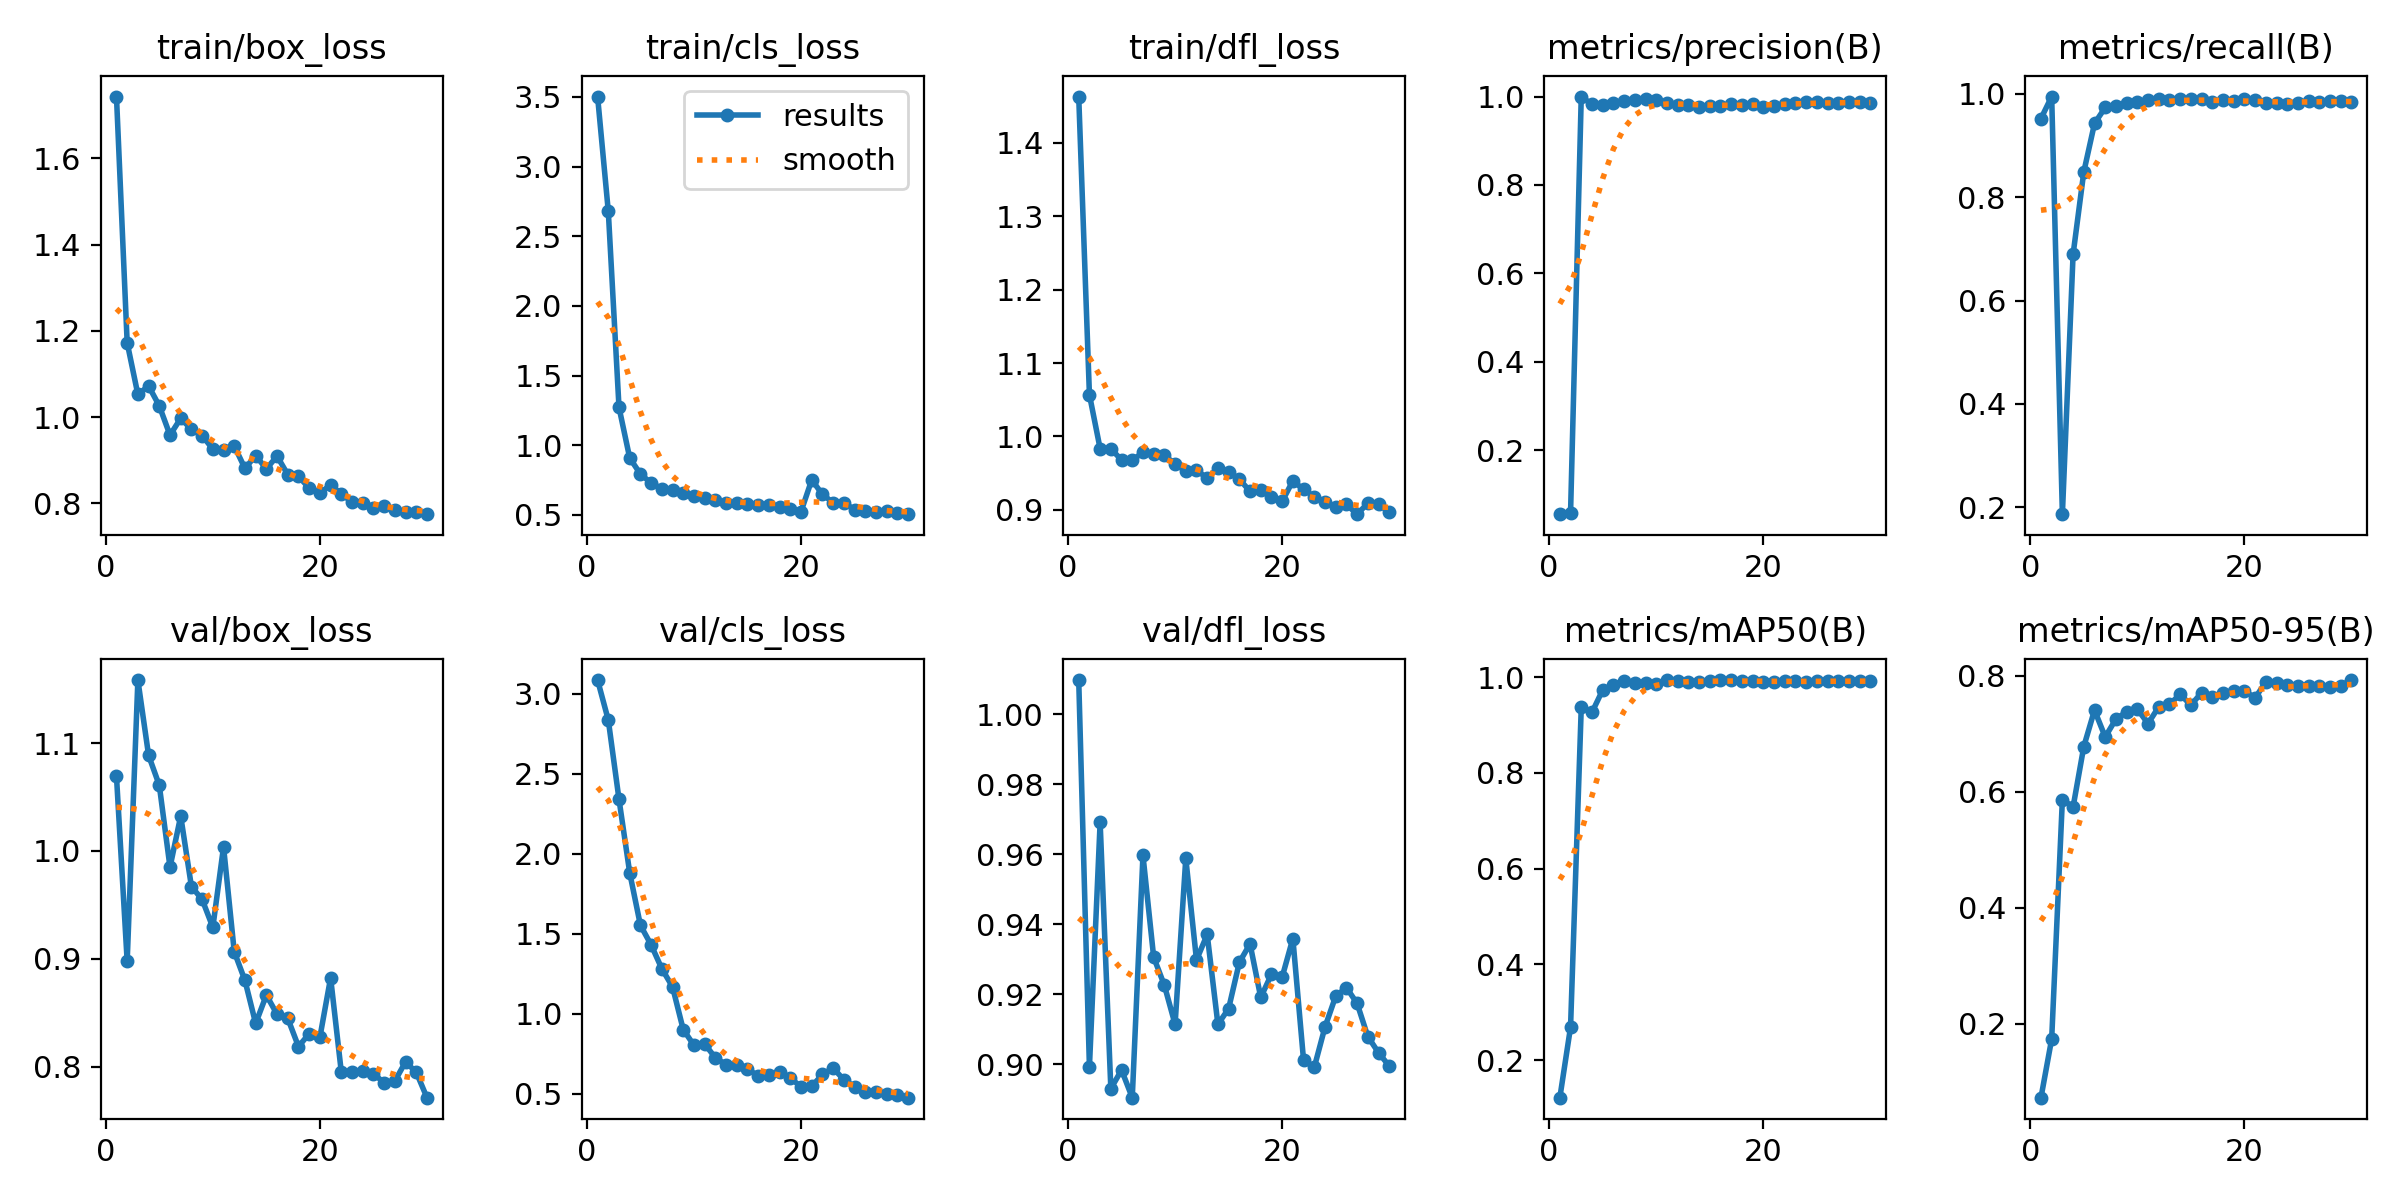

In [26]:
results_path = os.path.join(model_chula.trainer.save_dir, "results.png")
if os.path.exists(results_path):
    display(Image(filename=results_path))

# 📈 Step 8: Evaluate Model Performance

Ultralytics 8.3.181 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1044.8±235.4 MB/s, size: 71.4 KB)


val: Scanning /content/datasets/medical-pills/labels/val.cache... 23 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]


                   all         23        399      0.986      0.985      0.991       0.79
Speed: 9.6ms preprocess, 3.7ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/yolo_medical_pills_chula3
✅ Evaluation metrics: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fe6a0aecb10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.

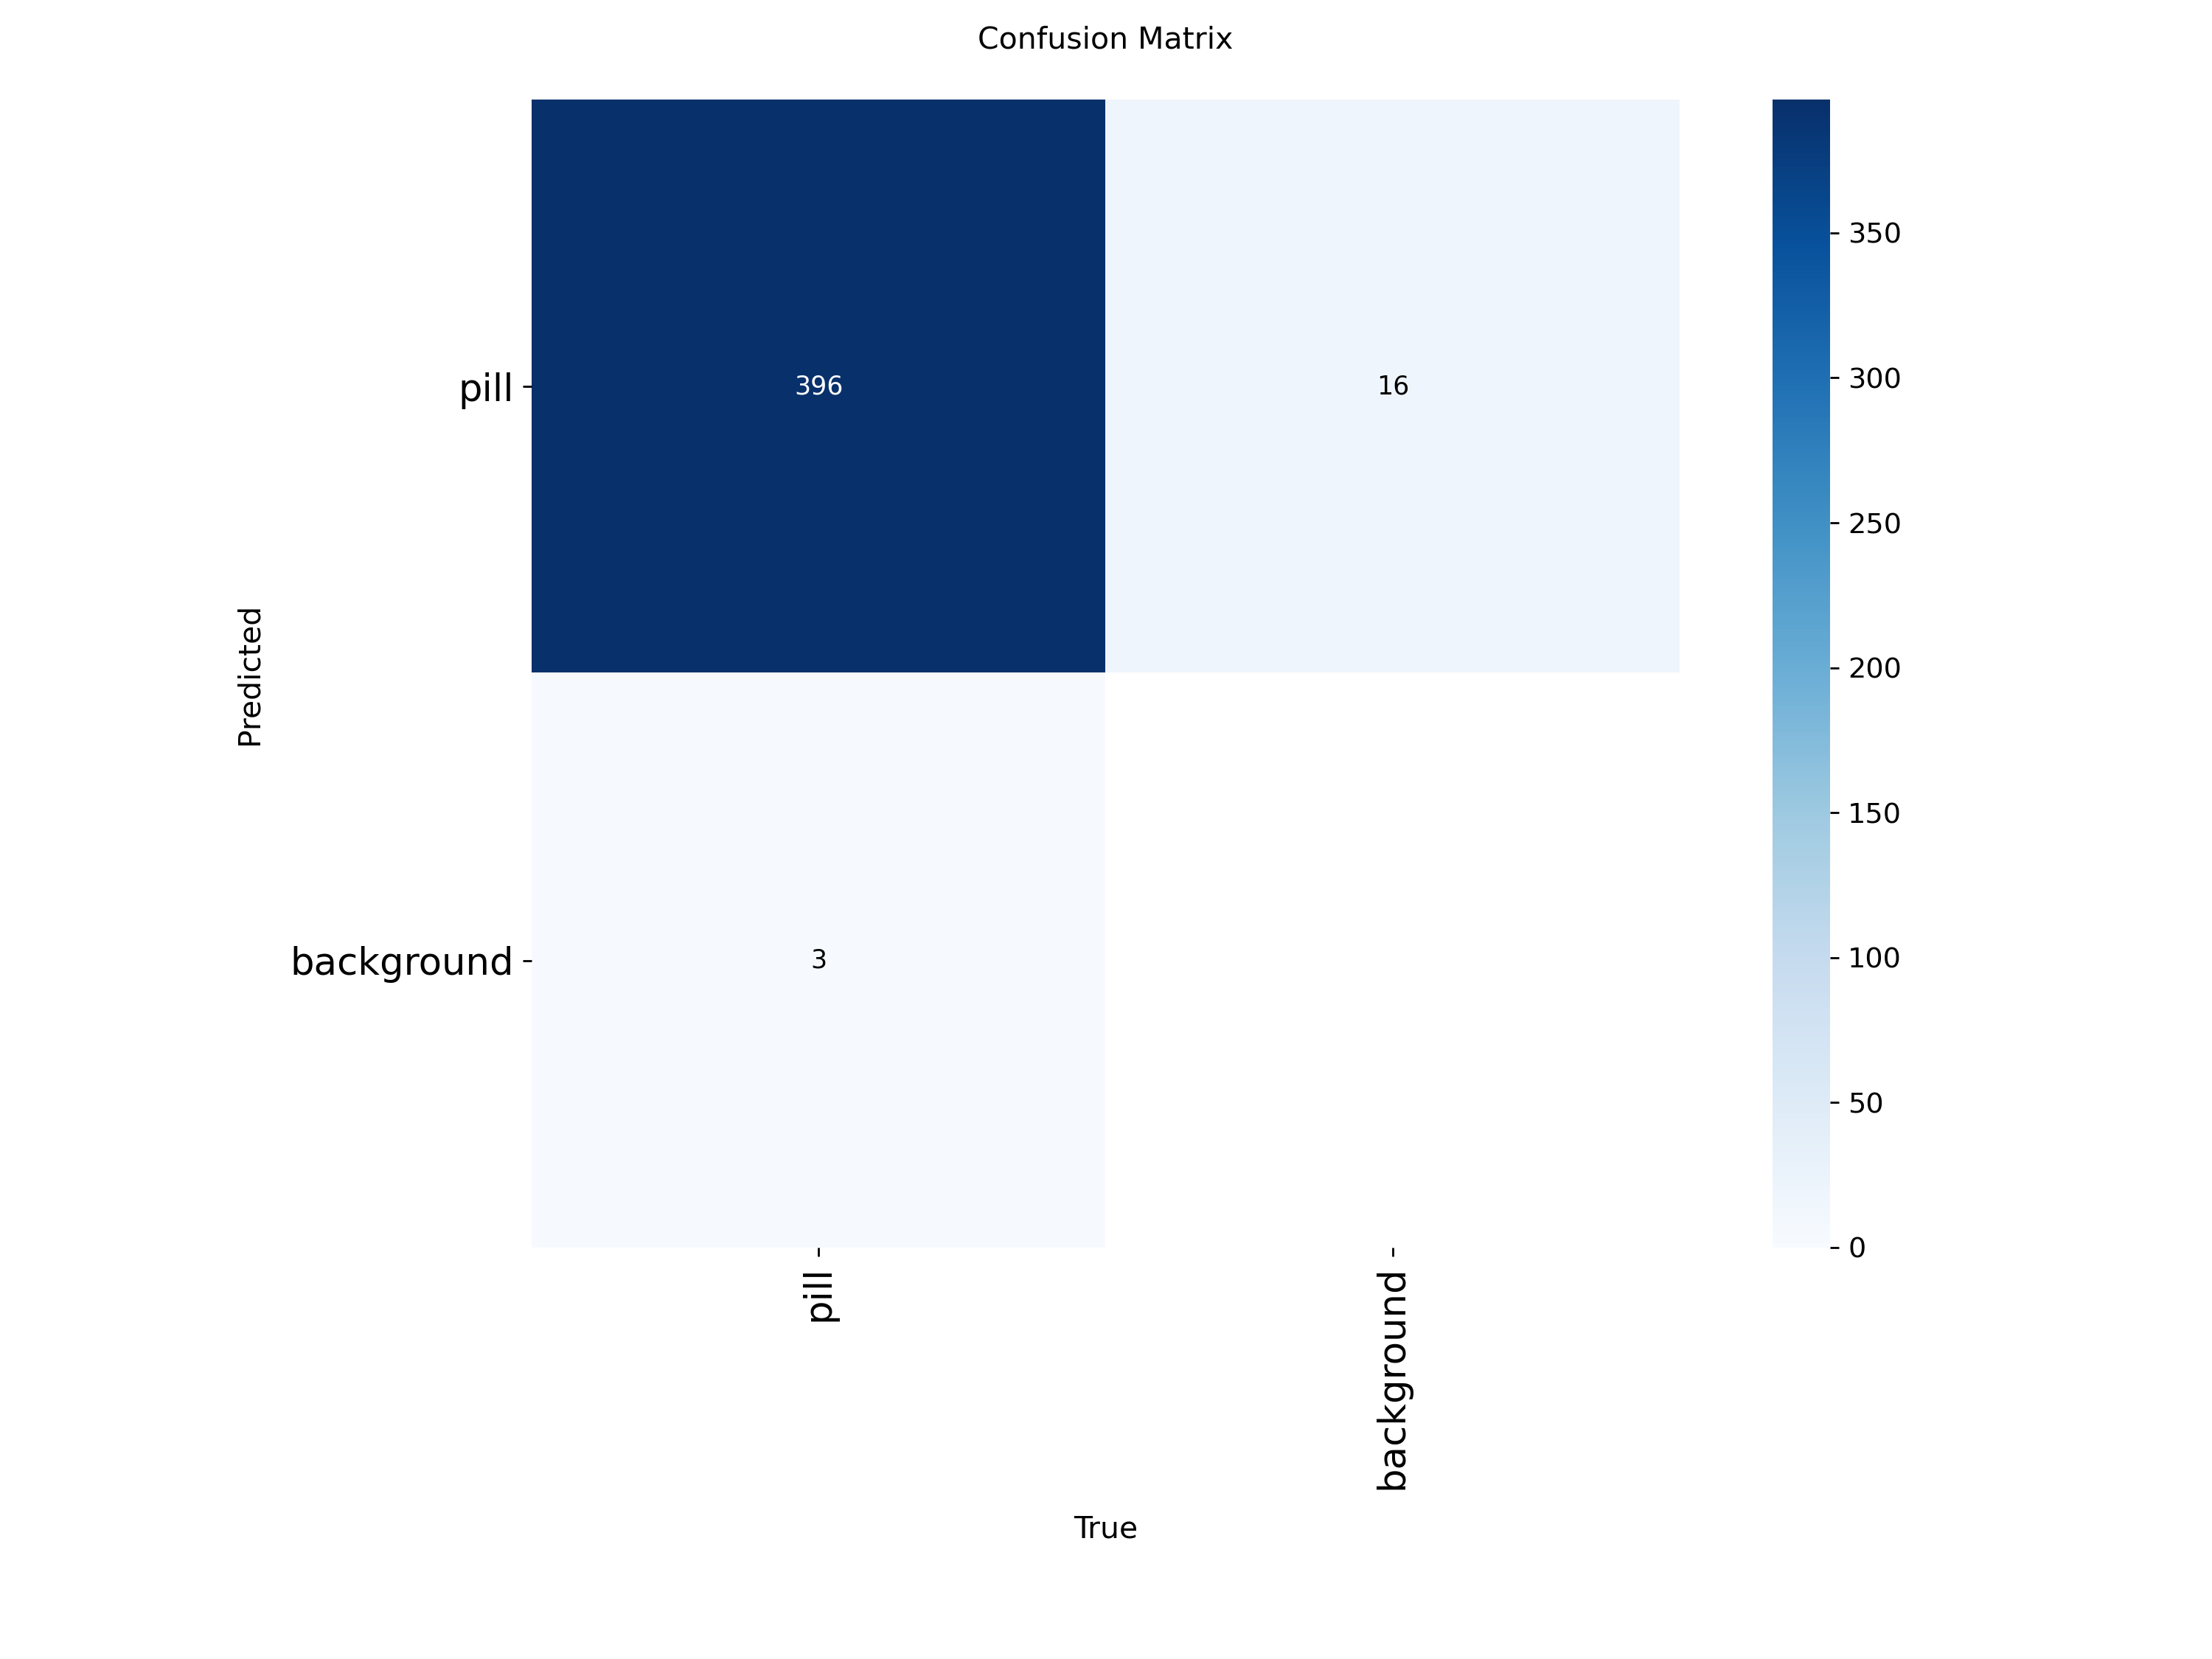

In [27]:
metrics = model_chula.val(save=True, plots=True)
print("✅ Evaluation metrics:", metrics)

eval_dir = model_chula.trainer.save_dir
for plot_name in ["confusion_matrix.png", "PR_curve.png", "F1_curve.png"]:
    plot_path = os.path.join(eval_dir, plot_name)
    if os.path.exists(plot_path):
        display(Image(filename=plot_path))

# 🔮 Step 9: Inference on a Random Validation Image


image 1/1 /content/datasets/medical-pills/images/val/Frame_416.jpg: 384x640 19 pills, 36.9ms
Speed: 3.0ms preprocess, 36.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/yolo_medical_pills_chula4
🔍 Prediction done on: /content/datasets/medical-pills/images/val/Frame_416.jpg


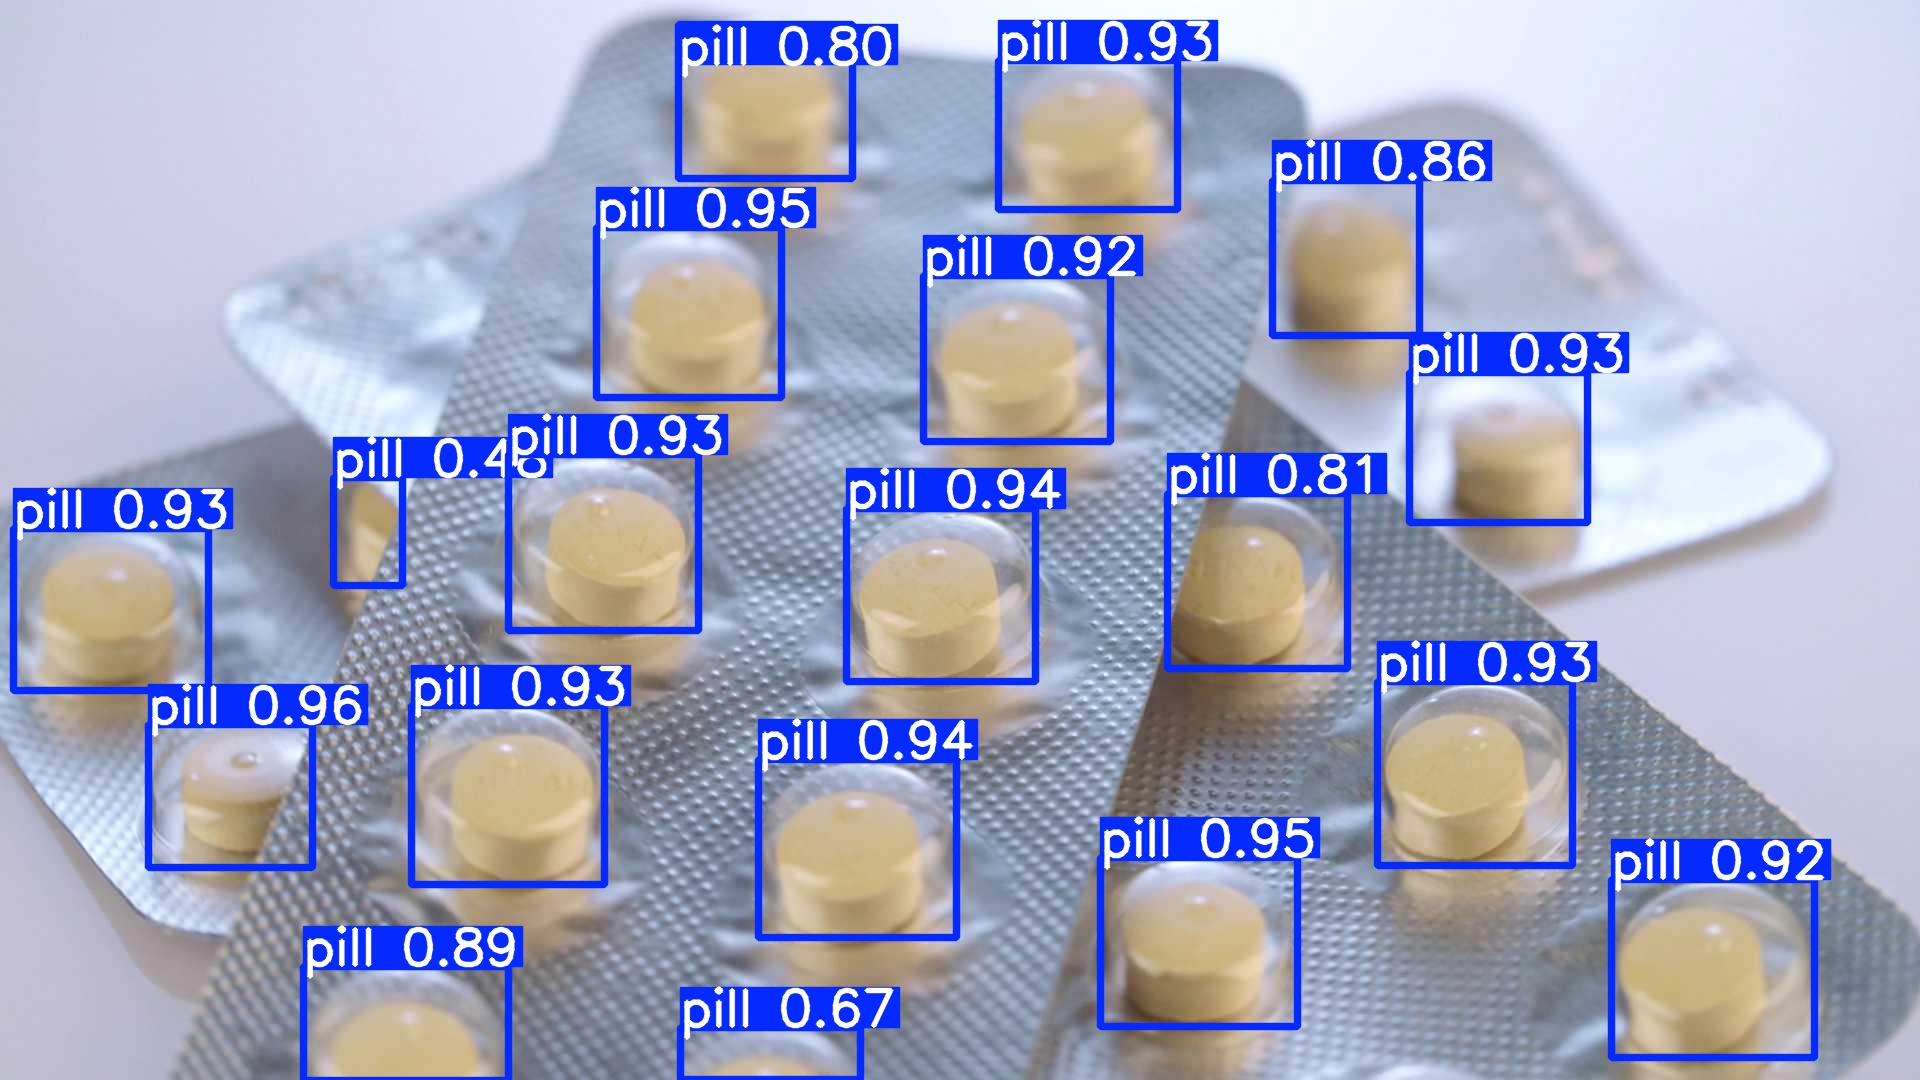

In [28]:
val_images = glob.glob(os.path.join(dataset_dir, "images/val/*.jpg"))
test_img = random.choice(val_images)

# Run inference and save output
results = model_chula(test_img, save=True)
print("🔍 Prediction done on:", test_img)

# ✅ Correct way to get saved prediction image path
pred_dir = results[0].save_dir  # directory YOLO saved results
pred_img = os.path.join(pred_dir, os.path.basename(results[0].path))

display(Image(filename=pred_img))
